In [18]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
from citipy import citipy
from config import weather_api_key
from datetime import datetime
import time
from scipy.stats import linregress

# Establish API URL for openweather API.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count.
len(cities)

633

In [5]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to th record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(), 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds, 
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        
# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass
    
# Indicate the Data Loading is complete.
print("----------------------------")
print("Data Retrieval Complete     ")
print("----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | achacachi
Processing Record 2 of Set 1 | cape town
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | nikolskoye
Processing Record 5 of Set 1 | kahului
Processing Record 6 of Set 1 | severo-kurilsk
Processing Record 7 of Set 1 | gonbad-e qabus
Processing Record 8 of Set 1 | nanortalik
Processing Record 9 of Set 1 | isangel
Processing Record 10 of Set 1 | mrirt
City not found. Skipping...
Processing Record 11 of Set 1 | oxapampa
Processing Record 12 of Set 1 | trenton
Processing Record 13 of Set 1 | hambantota
Processing Record 14 of Set 1 | rikitea
Processing Record 15 of Set 1 | magistralnyy
Processing Record 16 of Set 1 | guerrero negro
Processing Record 17 of Set 1 | caucaia
Processing Record 18 of Set 1 | qaanaaq
Processing Record 19 of Set 1 | coihaique
Processing Record 20 of Set 1 | bethanien
Processing Record 21 of Set 1 | new norfolk
Processing Record 22 of Set 1 | alb

Processing Record 36 of Set 4 | reconquista
Processing Record 37 of Set 4 | sangar
Processing Record 38 of Set 4 | ormara
Processing Record 39 of Set 4 | esperance
Processing Record 40 of Set 4 | darovskoy
Processing Record 41 of Set 4 | khandyga
Processing Record 42 of Set 4 | inta
Processing Record 43 of Set 4 | ornskoldsvik
Processing Record 44 of Set 4 | grande-riviere
City not found. Skipping...
Processing Record 45 of Set 4 | ketchikan
Processing Record 46 of Set 4 | saleaula
City not found. Skipping...
Processing Record 47 of Set 4 | shenkursk
Processing Record 48 of Set 4 | ondjiva
Processing Record 49 of Set 4 | abalak
Processing Record 50 of Set 4 | sumbawa
City not found. Skipping...
Processing Record 1 of Set 5 | ulladulla
Processing Record 2 of Set 5 | tobermory
Processing Record 3 of Set 5 | arandas
Processing Record 4 of Set 5 | rio gallegos
Processing Record 5 of Set 5 | juquitiba
Processing Record 6 of Set 5 | tazmalt
Processing Record 7 of Set 5 | mayo
Processing Reco

Processing Record 28 of Set 8 | nova olinda do norte
Processing Record 29 of Set 8 | graciano sanchez
Processing Record 30 of Set 8 | kodinsk
Processing Record 31 of Set 8 | laguna
Processing Record 32 of Set 8 | saint-georges
Processing Record 33 of Set 8 | rocha
Processing Record 34 of Set 8 | cap malheureux
Processing Record 35 of Set 8 | kokuy
Processing Record 36 of Set 8 | fairbanks
Processing Record 37 of Set 8 | lichinga
Processing Record 38 of Set 8 | sexsmith
Processing Record 39 of Set 8 | thessalon
Processing Record 40 of Set 8 | chagda
City not found. Skipping...
Processing Record 41 of Set 8 | sorland
Processing Record 42 of Set 8 | sentyabrskiy
City not found. Skipping...
Processing Record 43 of Set 8 | aksu
Processing Record 44 of Set 8 | saint-pierre
Processing Record 45 of Set 8 | balad
Processing Record 46 of Set 8 | columbus
Processing Record 47 of Set 8 | mount isa
Processing Record 48 of Set 8 | malanje
Processing Record 49 of Set 8 | moose factory
Processing Reco

City not found. Skipping...
Processing Record 12 of Set 12 | urdzhar
City not found. Skipping...
Processing Record 13 of Set 12 | gazanjyk
Processing Record 14 of Set 12 | codrington
Processing Record 15 of Set 12 | churapcha
Processing Record 16 of Set 12 | pokhara
Processing Record 17 of Set 12 | baruun-urt
Processing Record 18 of Set 12 | urla
Processing Record 19 of Set 12 | jijiga
Processing Record 20 of Set 12 | vanimo
Processing Record 21 of Set 12 | wadi
Processing Record 22 of Set 12 | santiago de cao
Processing Record 23 of Set 12 | kuytun
Processing Record 24 of Set 12 | palmer
Processing Record 25 of Set 12 | luau
Processing Record 26 of Set 12 | saint anthony
Processing Record 27 of Set 12 | clarence town
Processing Record 28 of Set 12 | longlac
City not found. Skipping...
Processing Record 29 of Set 12 | mastic beach
Processing Record 30 of Set 12 | mwinilunga
Processing Record 31 of Set 12 | luanda
Processing Record 32 of Set 12 | terra santa
Processing Record 33 of Set 

In [6]:
len(city_data)

575

In [7]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Achacachi,-16.05,-68.68,47.28,68,92,7.87,BO,2020-10-25 00:11:57
1,Cape Town,-33.93,18.42,60.01,93,75,4.70,ZA,2020-10-25 00:10:25
2,Ushuaia,-54.80,-68.30,46.40,61,75,5.82,AR,2020-10-25 00:11:57
3,Nikolskoye,59.70,30.79,39.00,86,75,4.47,RU,2020-10-25 00:08:27
4,Kahului,20.89,-156.47,91.40,52,40,16.11,US,2020-10-25 00:07:36


In [8]:
# Reorder the columns of the DataFrame.
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]

city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Achacachi,BO,2020-10-25 00:11:57,-16.05,-68.68,47.28,68,92,7.87
1,Cape Town,ZA,2020-10-25 00:10:25,-33.93,18.42,60.01,93,75,4.70
2,Ushuaia,AR,2020-10-25 00:11:57,-54.80,-68.30,46.40,61,75,5.82
3,Nikolskoye,RU,2020-10-25 00:08:27,59.70,30.79,39.00,86,75,4.47
4,Kahului,US,2020-10-25 00:07:36,20.89,-156.47,91.40,52,40,16.11


In [10]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

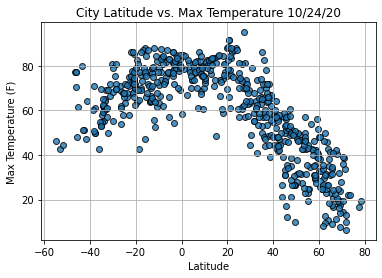

In [12]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps, 
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature " + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

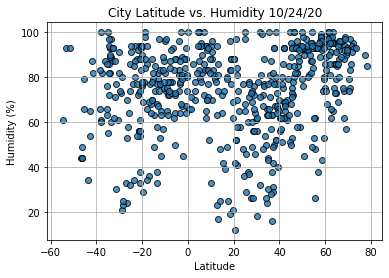

In [13]:
# Build the scatter plot for  vs. max temperature.
plt.scatter(lats,
            humidity, 
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity " + time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

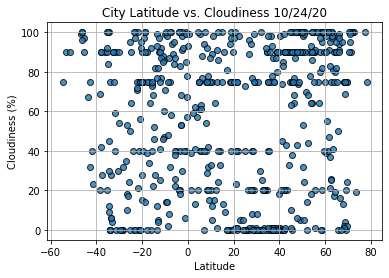

In [14]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            cloudiness, 
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness " + time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

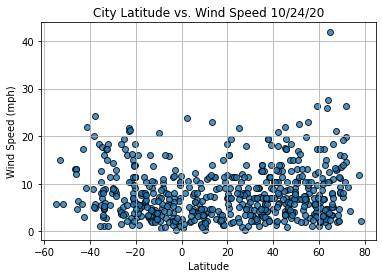

In [15]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            wind_speed, 
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed " + time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [16]:
# Create a function to perform lineat regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [20]:
index13 = city_data_df.loc[13]
index13

City                 Magistralnyy
Country                        RU
Date          2020-10-25 00:11:59
Lat                         56.17
Lng                        107.45
Max Temp                    34.77
Humidity                       93
Cloudiness                    100
Wind Speed                   2.86
Name: 13, dtype: object

In [21]:
city_data_df["Lat"] >= 0

0      False
1      False
2      False
3       True
4       True
       ...  
570     True
571    False
572     True
573    False
574     True
Name: Lat, Length: 575, dtype: bool

In [22]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

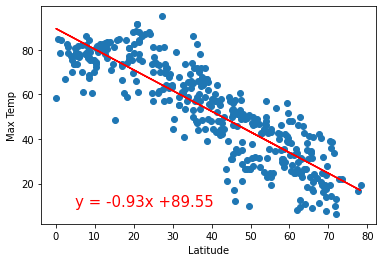

In [27]:
# Linear regressin on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(5,10))

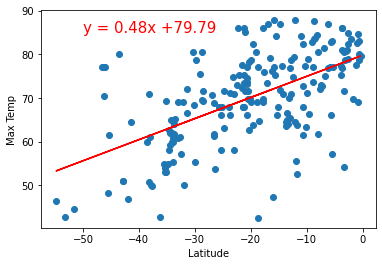

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp', (-50, 85))

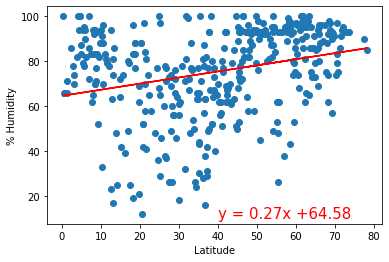

In [32]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity', (40,10))

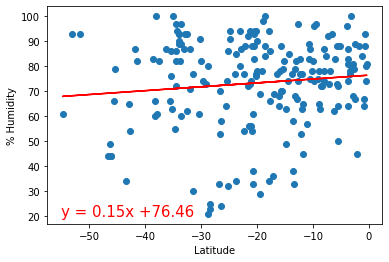

In [38]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity', (-55,20))

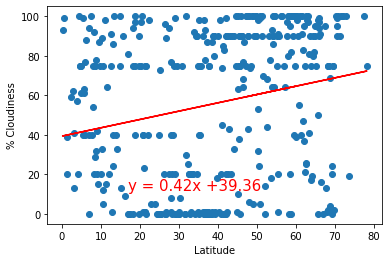

In [47]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness', (17,12))

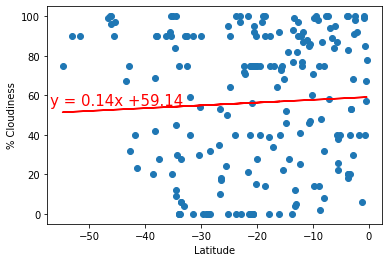

In [54]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness', (-57,55))

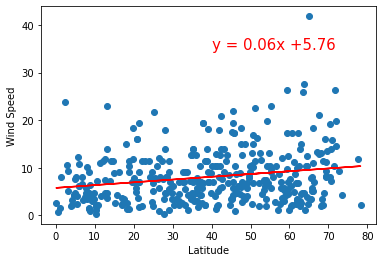

In [55]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed', (40,35))

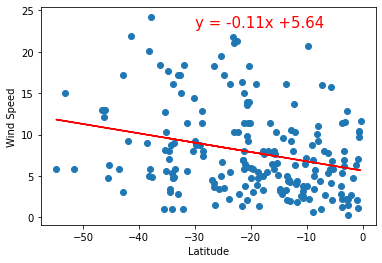

In [64]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed', (-30,23))